#  $  \huge  \mathcal{ \color{red}{ \text{Bayesian optimization }}}$ with  AX library for the optimization of multimodal functions

In [97]:
#!pip3 install ax-platform  # all systems

In [59]:

import numpy as np
import math
%matplotlib notebook 
%matplotlib inline

###############################################################################
# Basic Benchmark functions
###############################################################################

###############################################################################
# F1: Five-Uneven-Peak Trap
# Variable ranges: x in [0, 30
# No. of global peaks: 2
# No. of local peaks:  3.
def five_uneven_peak_trap(x):
    if x >= 0 and x < 2.50:
        result = 80 * (2.5 - x)
    elif x >= 2.5 and x < 5:
        result = 64 * (x - 2.5)
    elif x >= 5.0 and x < 7.5:
        result = 64 * (7.5 - x)
    elif x >= 7.5 and x < 12.5:
        result = 28 * (x - 7.5)
    elif x >= 12.5 and x < 17.5:
        result = 28 * (17.5 - x)
    elif x >= 17.5 and x < 22.5:
        result = 32 * (x - 17.5)
    elif x >= 22.5 and x < 27.5:
        result = 32 * (27.5 - x)
    elif x >= 27.5 and x <= 30:
        result = 80 * (x - 27.5)
    return result


###############################################################################
# F2: Equal Maxima
# Variable ranges: x in [0, 1]
# No. of global peaks: 5
# No. of local peaks:  0.
def equal_maxima(x=None):

    if x is None:
        return None

    return np.sin(5.0 * np.pi * x) ** 6


###############################################################################
# F3: Uneven Decreasing Maxima
# Variable ranges: x in [0, 1]
# No. of global peaks: 1
# No. of local peaks:  4.
def uneven_decreasing_maxima(x=None):

    if x is None:
        return None

    return (
        np.exp(-2.0 * np.log(2) * ((x - 0.08) / 0.854) ** 2)
        * (np.sin(5 * np.pi * (x ** 0.75 - 0.05))) ** 6
    )


###############################################################################
# F4: Himmelblau
# Variable ranges: x, y in [-6, 6
# No. of global peaks: 4
# No. of local peaks:  0.
def himmelblau(x=None):

    if x is None:
        return None

    result = 200 - (x[0] ** 2 + x[1] - 11) ** 2 - (x[0] + x[1] ** 2 - 7) ** 2
    return result


###############################################################################
# F5: Six-Hump Camel Back
# Variable ranges: x in [-1.9, 1.9]; y in [-1.1, 1.1]
# No. of global peaks: 2
# No. of local peaks:  2.
def six_hump_camel_back(x=None):

    if x is None:
        return None

    x2 = x[0] ** 2
    x4 = x[0] ** 4
    y2 = x[1] ** 2
    expr1 = (4.0 - 2.1 * x2 + x4 / 3.0) * x2
    expr2 = x[0] * x[1]
    expr3 = (4.0 * y2 - 4.0) * y2
    return -1.0 * (expr1 + expr2 + expr3)
    # result = (-4)*((4 - 2.1*(x[0]**2) + (x[0]**4)/3.0)*(x[0]**2) + x[0]*x[1] + (4*(x[1]**2) - 4)*(x[1]**2))
    # return result


###############################################################################
# F6: Shubert
# Variable ranges: x_i in  [-10, 10]^n, i=1,2,...,n
# No. of global peaks: n*3^n
# No. of local peaks: many
def shubert(x=None):

    if x is None:
        return None

    i = 0
    result = 1
    soma = [0] * len(x)
    D = len(x)

    while i < D:
        for j in range(1, 6):
            soma[i] = soma[i] + (j * math.cos((j + 1) * x[i] + j))
        result = result * soma[i]
        i = i + 1
    return -result


###############################################################################
# F7: Vincent
# Variable range: x_i in [0.25, 10]^n, i=1,2,...,n
# No. of global optima: 6^n
# No. of local optima:  0.
def vincent(x=None):

    if x is None:
        return None

    result = 0
    D = len(x)

    for i in range(0, D):
        result += (math.sin(10 * math.log(x[i]))) / D
    return result


###############################################################################
# F8: Modified Rastrigin - All Global Optima
# Variable ranges: x_i in [0, 1]^n, i=1,2,...,n
# No. of global peaks: \prod_{i=1}^n k_i
# No. of local peaks:  0.
def modified_rastrigin_all(x=None):

    if x is None:
        return None

    result = 0
    D = len(x)
    if D == 2:
        k = [3, 4]
    elif D == 8:
        k = [1, 2, 1, 2, 1, 3, 1, 4]
    elif D == 16:
        k = [1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 4]

    for i in range(0, D):
        result += 10 + 9 * math.cos(2 * math.pi * k[i] * x[i])
    return -result


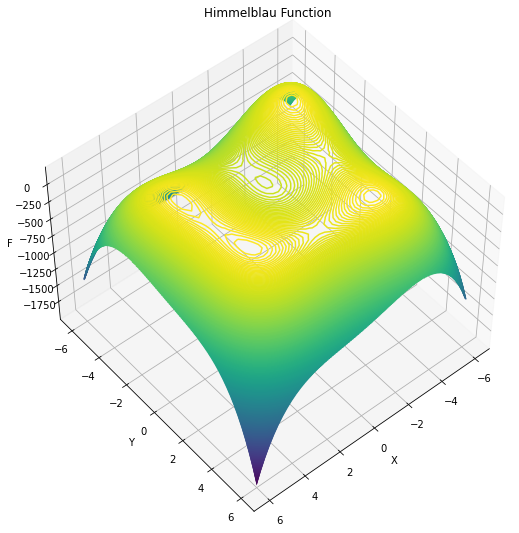

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d 

def f(x,y):
       return 200.-(((x**2+y-11)**2) + (((x+y**2-7)**2)))

X=np.linspace(-6,6)
Y=np.linspace(-6,6)

x,y=np.meshgrid(X,Y)
xx=[x,y]
F=f(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F')
ax.set_title('Himmelblau Function')
ax.view_init(50,50)

#plt.contour(x,y,F,15)
plt.show()

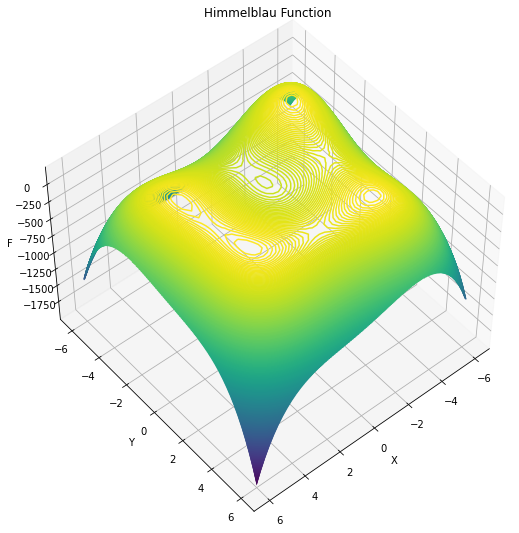

In [61]:
x,y=np.meshgrid(X,Y)
xx=np.array([x,y])
F=himmelblau(xx)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F')
ax.set_title('Himmelblau Function')
ax.view_init(50,50)

#plt.contour(x,y,F,15)
plt.show()

In [62]:
x=np.linspace(0,30,1000)
y=[five_uneven_peak_trap(x[i]) for i in range(len(x))]

In [63]:
import matplotlib.pyplot as plt


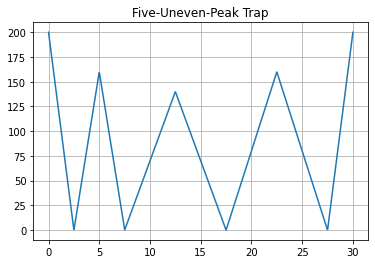

In [64]:
plt.plot(x,y)
plt.grid(True)
plt.title('Five-Uneven-Peak Trap')
plt.show()


In [72]:
from ax import optimize
best_parameters, best_values, experiment, model = optimize(
        parameters=[
          {
            "name": "x1",
            "type": "range",
            "bounds": [-6.0, 6.0],
          },
          {
            "name": "x2",
            "type": "range",
            "bounds": [-6.0, 6.0],
          },
        ],
        # Booth function
        evaluation_function=    lambda p: 200.0-(((p["x1"]**2+p["x2"]-11)**2) + (((p["x1"]+p["x2"]**2-7)**2))),

    #lambda x: (-4)*((4 - 2.1*(x["x1"]**2) + (x["x1"]**4)/3.0)*(x["x1"]**2) + \
                                           #  x["x1"]*x["x2"] + (4*(x["x2"]**2) - 4)*(x["x2"]**2)),
    #lambda p: (p["x1"] + 2*p["x2"] - 7)**2 + (2*p["x1"] + p["x2"] - 5)**2,
        minimize=True,
    )

# best_parameters contains {'x1': 1.02, 'x2': 2.97}; the global min is (1, 3)

[INFO 11-29 17:52:32] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-29 17:52:32] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-29 17:52:32] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='x1', parameter_type=FLOAT, range=[-6.0, 6.0]), RangeParameter(name='x2', parameter_type=FLOAT, range=[-6.0, 6.0])], parameter_constraints=[]).
[INFO 11-29 17:52:32] ax.modelbridge.dispatch_utils: Using Bayesian optimization since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 11-29 17:52:32] ax.modelbridge.dispatch_utils: 

In [73]:
best_parameters 
#contains {'x1': 1.02, 'x2': 2.97}; the global min is (1, 3)

{'x1': 6.0, 'x2': 6.0}

In [74]:
f(6,6)

-1986.0

In [75]:
np.min(f(X,Y))

-1986.0

In [76]:
import torch
import numpy as np

from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting
from ax.utils.tutorials.cnn_utils import load_mnist, train, evaluate, CNN



In [77]:
from typing import Any, Dict, Optional, Tuple, Type

# Ax wrappers for BoTorch components
from ax.models.torch.botorch_modular.model import BoTorchModel
from ax.models.torch.botorch_modular.surrogate import Surrogate
from ax.models.torch.botorch_modular.list_surrogate import ListSurrogate
from ax.models.torch.botorch_modular.acquisition import Acquisition

# Ax data tranformation layer
from ax.modelbridge.torch import TorchModelBridge
from ax.modelbridge.registry import Cont_X_trans, Y_trans, Models

# Experiment examination utilities
from ax.service.utils.report_utils import exp_to_df


# BoTorch components
from botorch.models.model import Model
from botorch.models.gp_regression import FixedNoiseGP
from botorch.acquisition.monte_carlo import qExpectedImprovement, qNoisyExpectedImprovement
from gpytorch.mlls.exact_marginal_log_likelihood import ExactMarginalLogLikelihood

In [78]:
from ax.modelbridge.generation_strategy import GenerationStep, GenerationStrategy
from botorch.acquisition import UpperConfidenceBound
from ax.modelbridge.modelbridge_utils import get_pending_observation_features



In [79]:
import pandas as pd

In [80]:
df=exp_to_df(experiment)

In [81]:
df

,objective,trial_index,arm_name,x1,x2,trial_status,generation_method
0,159.654073,0,0_0,2.526292,0.099050,COMPLETED,Sobol
1,167.036508,1,1_0,3.731396,-3.001575,COMPLETED,Sobol
2,26.152034,2,2_0,-3.973778,4.507934,COMPLETED,Sobol
3,-77.791409,3,3_0,-4.931745,2.726381,COMPLETED,Sobol
4,166.357109,4,4_0,-1.751814,2.561158,COMPLETED,Sobol
5,-616.749163,5,5_0,-6.000000,1.585487,COMPLETED,GPEI
6,-465.676204,6,6_0,-6.000000,-1.519122,COMPLETED,GPEI
7,-690.000000,7,7_0,-6.000000,-6.000000,COMPLETED,GPEI
8,-432.488827,8,8_0,-3.909349,-6.000000,COMPLETED,GPEI
9,-251.268585,9,9_0,-6.000000,-4.097190,COMPLETED,GPEI


In [82]:
print(df.to_latex(index=False))  

\begin{tabular}{rrlrrll}
\toprule
   objective &  trial\_index & arm\_name &        x1 &        x2 & trial\_status & generation\_method \\
\midrule
  159.654073 &            0 &      0\_0 &  2.526292 &  0.099050 &    COMPLETED &             Sobol \\
  167.036508 &            1 &      1\_0 &  3.731396 & -3.001575 &    COMPLETED &             Sobol \\
   26.152034 &            2 &      2\_0 & -3.973778 &  4.507934 &    COMPLETED &             Sobol \\
  -77.791409 &            3 &      3\_0 & -4.931745 &  2.726381 &    COMPLETED &             Sobol \\
  166.357109 &            4 &      4\_0 & -1.751814 &  2.561158 &    COMPLETED &             Sobol \\
 -616.749163 &            5 &      5\_0 & -6.000000 &  1.585487 &    COMPLETED &              GPEI \\
 -465.676204 &            6 &      6\_0 & -6.000000 & -1.519122 &    COMPLETED &              GPEI \\
 -690.000000 &            7 &      7\_0 & -6.000000 & -6.000000 &    COMPLETED &              GPEI \\
 -432.488827 &            8 &      8

In [86]:

means, covariances = best_values
means, covariances


({'objective': -1890.9505109894285},
 {'objective': {'objective': 2651.1835948743933}})

In [94]:
# `plot_single_method` expects a 2-d array of means, because it expects to average means from multiple 
# optimization runs, so we wrap out best objectives array in another array.
best_objectives = np.array([[trial.objective_mean for trial in experiment.trials.values()]])
best_objective_plot = optimization_trace_single_method(
    y=best_objectives,
    title="Model performance vs. # of iterations",
    ylabel="best objectives values",
)
render(best_objective_plot)